Chapter 26
# 正圆散点的几何变换
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
# 导入包
import numpy as np
from matplotlib import pyplot as plt 
from matplotlib import cm

import os
# 如果文件夹不存在，创建文件夹
if not os.path.isdir("Figures"):
    os.makedirs("Figures")

### 产生数据

In [2]:
num_points = 37;
theta_array = np.linspace(0, 2*np.pi, num_points).reshape((-1, 1))

# 单位圆参数方程，散点
X_circle = np.column_stack((np.cos(theta_array),
                            np.sin(theta_array)))
# 单位圆散点，利用色谱逐一渲染
colors = plt.cm.rainbow(np.linspace(0,1,len(X_circle)))

theta_array_fine = np.linspace(0, 2*np.pi, 500).reshape((-1, 1))

# 单位圆参数方程，连线
X_circle_fine = np.column_stack((np.cos(theta_array_fine),
                            np.sin(theta_array_fine)))

# 1/4正方形顶点，首尾相连
X_square = np.array([[0, 0],
                     [0, 1],
                     [1, 1],
                     [1, 0],
                     [0, 0]])

# 完整正方形顶点，首尾相连
X_square_big = np.array([[1, 1],
                         [1, -1],
                         [-1, -1],
                         [-1, 1],
                         [1, 1]])

# 圆心坐标
center_array = X_circle*0

### Chol分解

In [4]:
A = np.array([[1.25, -0.75],
              [-0.75,1.25]])

SIGMA = A.T @ A
L = np.linalg.cholesky(SIGMA)
R = L.T 

### 可视化

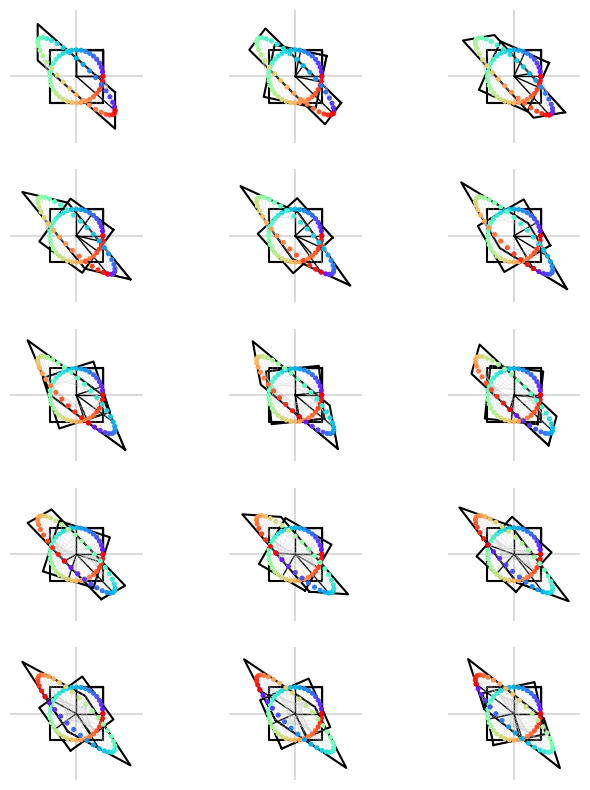

In [5]:
fig, axs = plt.subplots(figsize = (8,10), nrows = 5, ncols = 3)

for theta, ax_idx in zip(np.linspace(0, np.pi, 15, endpoint=False), axs.ravel()):
    
    # 定义旋转矩阵
    U = np.array([[np.cos(theta), -np.sin(theta)],
                  [np.sin(theta), np.cos(theta)]])
    
    # 只旋转
    X_square_R_rotated = X_square @ U
    X_square_big_R_rotated = X_square_big @ U
    
    # 先旋转，再剪切
    X_R = X_circle @ U @ R
    X_circle_fine_R = X_circle_fine @ U @ R
    X_square_R = X_square @ U @ R
    X_square_big_R = X_square_big @ U @R

    
    # 绘制单位圆
    ax_idx.plot(X_circle_fine[:,0],X_circle_fine[:,1],c=[0.8,0.8,0.8], lw = 0.2)
    
    # 绘制单位圆上的“小彩灯”
    ax_idx.scatter(X_circle[:,0],X_circle[:,1], s = 28, marker = '.', c = colors, zorder=1e3)
    
    # 绘制大小两个正方形
    ax_idx.plot(X_square[:,0],X_square[:,1],c='k', linewidth = 1)
    ax_idx.plot(X_square_big[:,0],X_square_big[:,1],c='k')
    
    # 绘制大小两个正方形，剪切
    ax_idx.plot(X_square_R[:,0],X_square_R[:,1],c='k', linewidth = 1)
    ax_idx.plot(X_square_big_R[:,0],X_square_big_R[:,1],c='k')

    # 绘制大小两个正方形，剪切 > 旋转
    ax_idx.plot(X_square_R_rotated[:,0],X_square_R_rotated[:,1],c='k', linewidth = 1)
    ax_idx.plot(X_square_big_R_rotated[:,0],X_square_big_R_rotated[:,1],c='k')
    
    # 绘制椭圆
    ax_idx.plot(X_circle_fine_R[:,0],X_circle_fine_R[:,1],c=[0.8,0.8,0.8], lw = 0.2)
    
    # 绘制两点连线，可视化散点运动轨迹
    ax_idx.plot(([i for (i,j) in X_circle], [i for (i,j) in X_R]),
              ([j for (i,j) in X_circle], [j for (i,j) in X_R]),c=[0.8,0.8,0.8], lw = 0.2)
    
    # 绘制椭圆上的“小彩灯”
    ax_idx.scatter(X_R[:,0],X_R[:,1], s = 28, marker = '.', c = colors, zorder=1e3)
    
    # 绘制水平、竖直线
    ax_idx.axvline(x = 0, c = 'k', lw = 0.2)
    ax_idx.axhline(y = 0, c = 'k', lw = 0.2)
    
    # 装饰
    ax_idx.axis('scaled')
    ax_idx.set_xbound(lower = -2.5, upper = 2.5)
    ax_idx.set_ybound(lower = -2.5, upper = 2.5)
    ax_idx.set_xticks([])
    ax_idx.set_yticks([])
    ax_idx.spines['top'].set_visible(False)
    ax_idx.spines['right'].set_visible(False)
    ax_idx.spines['bottom'].set_visible(False)
    ax_idx.spines['left'].set_visible(False)
    
fig.savefig('Figures/正圆，正方形变换.svg', format='svg')

In [ ]:
# Repo: https://github.com/Visualize-ML
# Book 2 Beauty of Visualization  |  From Basic Arithmetic to Machine Learning
# Published and copyrighted by Tsinghua University Press
# Beijing, China, 2023